In [31]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
df = pd.read_csv("bank_balanced.csv")
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,y
0,25,student,single,unknown,no,480,no,no,cellular,8,sep,140,yes
1,28,services,married,secondary,no,510,yes,yes,cellular,8,jul,1767,yes
2,39,management,single,tertiary,no,0,yes,no,cellular,22,may,271,yes
3,45,housemaid,married,secondary,no,360,no,no,cellular,3,nov,215,yes
4,53,retired,married,tertiary,no,1691,no,no,unknown,13,may,916,no


In [32]:
for col_name in df.columns:
    if(df[col_name].dtype == 'object'):
        df[col_name]= df[col_name].astype('category')
        df[col_name] = df[col_name].cat.codes

In [33]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,y
0,25,8,2,3,0,480,0,0,0,8,11,140,1
1,28,7,1,1,0,510,1,1,0,8,5,1767,1
2,39,4,2,2,0,0,1,0,0,22,8,271,1
3,45,3,1,1,0,360,0,0,0,3,9,215,1
4,53,5,1,2,0,1691,0,0,2,13,8,916,0


In [34]:
df.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,y
age,1.000000,-0.029777,-0.438762,-0.123605,-0.015104,0.107145,-0.178802,-0.049349,0.031442,-0.003253,-0.027359,-0.009097,0.037869
job,-0.029777,1.000000,0.085266,0.147346,-0.015993,0.022767,-0.141901,-0.058409,-0.093189,0.011932,-0.081178,-0.000347,0.059641
marital,-0.438762,0.085266,1.000000,0.111732,-0.021264,0.001939,-0.044832,-0.034672,-0.060040,-0.004610,-0.019285,0.002723,0.070106
education,-0.123605,0.147346,0.111732,1.000000,-0.009344,0.069724,-0.105230,-0.056668,-0.130533,0.011530,-0.053522,-0.016239,0.111643
default,-0.015104,-0.015993,-0.021264,-0.009344,1.000000,-0.059680,0.021740,0.074149,0.023298,0.024605,-0.002545,-0.008445,-0.039463
balance,0.107145,0.022767,0.001939,0.069724,-0.059680,1.000000,-0.083097,-0.082839,-0.038439,0.011314,0.007297,0.020937,0.081316
housing,-0.178802,-0.141901,-0.044832,-0.105230,0.021740,-0.083097,1.000000,0.100504,0.220764,-0.018840,0.213348,0.036889,-0.219774
loan,-0.049349,-0.058409,-0.034672,-0.056668,0.074149,-0.082839,0.100504,1.000000,0.020025,0.006575,0.032653,0.007975,-0.118329
contact,0.031442,-0.093189,-0.060040,-0.130533,0.023298,-0.038439,0.220764,0.020025,1.000000,0.009864,0.290513,-0.010900,-0.259995
day,-0.003253,0.011932,-0.004610,0.011530,0.024605,0.011314,-0.018840,0.006575,0.009864,1.000000,-0.012903,-0.006581,-0.045614


In [35]:
df.drop(["day","month"], inplace=True, axis=1)

In [36]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,y
0,25,8,2,3,0,480,0,0,0,140,1
1,28,7,1,1,0,510,1,1,0,1767,1
2,39,4,2,2,0,0,1,0,0,271,1
3,45,3,1,1,0,360,0,0,0,215,1
4,53,5,1,2,0,1691,0,0,2,916,0


In [38]:
scaler = StandardScaler()
 
df[["age"]] = scaler.fit_transform(df[["age"]])

In [39]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,y
0,-1.353327,8,2,3,0,480,0,0,0,140,1
1,-1.102963,7,1,1,0,510,1,1,0,1767,1
2,-0.184961,4,2,2,0,0,1,0,0,271,1
3,0.315768,3,1,1,0,360,0,0,0,215,1
4,0.983406,5,1,2,0,1691,0,0,2,916,0


In [40]:
y = df.y.reset_index(drop=True)
X = df.drop(['y'],axis=1,inplace=False).reset_index(drop=True)

In [41]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=42)
X_train,X_test,y_train,y_test = X_train.reset_index(drop=True),X_test.reset_index(drop=True),y_train.reset_index(drop=True),y_test.reset_index(drop=True)

In [42]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,y
0,-1.353327,8,2,3,0,480,0,0,0,140,1
1,-1.102963,7,1,1,0,510,1,1,0,1767,1
2,-0.184961,4,2,2,0,0,1,0,0,271,1
3,0.315768,3,1,1,0,360,0,0,0,215,1
4,0.983406,5,1,2,0,1691,0,0,2,916,0


In [43]:
! pip install XGBoost

In [63]:
import xgboost as xgb
import numpy as np
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, confusion_matrix
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot

xg_reg = xgb.XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)
rmse = (mean_absolute_error(y_test, preds))
print("RMSE: %f" % (rmse))

[16:21:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 0.191682


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [58]:
accuracy_score(y_test, preds)


0.8083175803402647

In [64]:
import matplotlib.pyplot as plt
def confusio_matrix(y_test, y_predicted):
  cm = confusion_matrix(y_test, y_predicted)
  plt.figure(figsize=(15,10))
  plt.clf()
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
  classNames = ['Negative','Positive']
  plt.title('Matrice de confusion')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  tick_marks = np.arange(len(classNames))
  plt.xticks(tick_marks, classNames, rotation=45)
  plt.yticks(tick_marks, classNames)
  s = [['TN','FP'], ['FN', 'TP']]
  
  for i in range(2):
      for j in range(2):
          plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
  plt.show()

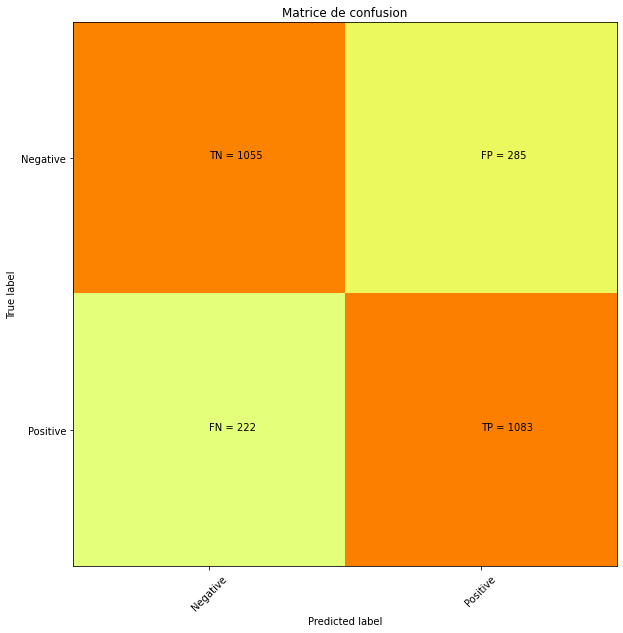

In [65]:
confusio_matrix(y_test, preds)